# **Importing Required Libraries** 

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style(style= 'darkgrid')

## **Loading the Data**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [89]:
# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)
df = pd.read_csv(r'/content/drive/MyDrive/diamonds.csv')

In [90]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [9]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [92]:
df.drop('Unnamed: 0',axis = 1,inplace= True)

In [93]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [94]:
# Import label encoder 
from sklearn import preprocessing

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'cut'. 
df['cut']= label_encoder.fit_transform(df['cut']) 

# Encode labels in column 'cut'. 
df['color']= label_encoder.fit_transform(df['color']) 

# Encode labels in column 'cut'. 
df['clarity']= label_encoder.fit_transform(df['clarity']) 


In [110]:
# Separate Target Variable and Predictor Variables
TargetVariable=['price']
Predictors=['carat', 'cut', 'color', 'clarity', 'depth', 'table','x', 'y', 'z']

In [111]:
X=df[Predictors].values
y=df[TargetVariable].values

In [112]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

In [139]:
# Storing the fit object for later reference
PredictorScalerFit= PredictorScaler.fit(X)
TargetVarScalerFit= TargetVarScaler.fit(y)


In [138]:
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

In [140]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [141]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(37758, 9)
(37758, 1)
(16182, 9)
(16182, 1)


In [100]:
# Install required libraries
#!pip install tensorflow
#!pip install keras

In [127]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=9, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# simple early stopping
#es = EarlyStopping(monitor='loss', mode='min', verbose=1)

# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 20,verbose=1 )

Epoch 1/20
1888/1888 [==============================] - 4s 2ms/step - loss: 0.1873
Epoch 2/20
1888/1888 [==============================] - 4s 2ms/step - loss: 0.0840
Epoch 3/20
1888/1888 [==============================] - 4s 2ms/step - loss: 0.0771
Epoch 4/20
1888/1888 [==============================] - 4s 2ms/step - loss: 0.0708
Epoch 5/20
1888/1888 [==============================] - 4s 2ms/step - loss: 0.0676
Epoch 6/20
1888/1888 [==============================] - 4s 2ms/step - loss: 0.0661
Epoch 7/20
1888/1888 [==============================] - 4s 2ms/step - loss: 0.0657
Epoch 8/20
1888/1888 [==============================] - 4s 2ms/step - loss: 0.0652
Epoch 9/20
1888/1888 [==============================] - 4s 2ms/step - loss: 0.0649
Epoch 10/20
1888/1888 [==============================] - 4s 2ms/step - loss: 0.0646
Epoch 11/20
1888/1888 [==============================] - 4s 2ms/step - loss: 0.0645
Epoch 12/20
1888/1888 [==============================] - 4s 2ms/step - loss: 0.0640
E

In [128]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)


######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 91.72674294399847
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 97.96214084665381
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 92.06147862485162
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 86.10546786139469
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 97.83843157645339
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 91.23859233955518
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 82.40119351990162
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 84.68911504971746
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 95.74954626838704
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 92.73093275492425
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 95.06546452018398
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 70.69249852450866
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 83.20178951791517
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 101.86385569460089
15 Parameters: batc

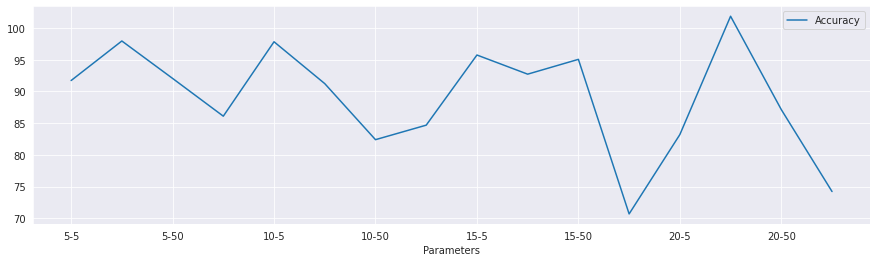

In [130]:
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

In [134]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 15, epochs = 5, verbose=0)

# Generating Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Price']=y_test_orig
TestingData['PredictedPrice']=Predictions
TestingData.head(20)

,carat,cut,color,clarity,depth,table,x,y,z,Price,PredictedPrice
0,0.24,2.0,3.0,6.0,62.1,56.0,3.97,4.00,2.47,559.0,469.592438
1,0.58,4.0,2.0,7.0,60.0,57.0,5.44,5.42,3.26,2201.0,2380.518555
2,0.40,2.0,1.0,7.0,62.1,55.0,4.76,4.74,2.95,1238.0,1506.063599
3,0.43,3.0,1.0,7.0,60.8,57.0,4.92,4.89,2.98,1304.0,1610.306274
4,1.55,2.0,1.0,3.0,62.3,55.0,7.44,7.37,4.61,6901.0,12252.166016
5,1.00,0.0,1.0,3.0,55.4,62.0,6.63,6.59,3.66,3011.0,4815.110352
6,0.51,2.0,2.0,4.0,60.2,56.0,5.22,5.24,3.15,1765.0,1432.308472
7,0.52,2.0,0.0,5.0,62.0,56.0,5.17,5.19,3.21,1679.0,1823.626343
8,0.62,3.0,1.0,5.0,60.0,59.0,5.58,5.56,3.34,2102.0,2232.447754
9,1.14,2.0,4.0,2.0,60.3,57.0,6.79,6.85,4.11,4789.0,6033.994141


In [135]:
# Computing the absolute percent error
APE=100*(abs(TestingData['Price']-TestingData['PredictedPrice'])/TestingData['Price'])
TestingData['APE']=APE

print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: 85.42460846960012


,carat,cut,color,clarity,depth,table,x,y,z,Price,PredictedPrice,APE
0,0.24,2.0,3.0,6.0,62.1,56.0,3.97,4.00,2.47,559.0,469.592438,15.994197
1,0.58,4.0,2.0,7.0,60.0,57.0,5.44,5.42,3.26,2201.0,2380.518555,8.156227
2,0.40,2.0,1.0,7.0,62.1,55.0,4.76,4.74,2.95,1238.0,1506.063599,21.652956
3,0.43,3.0,1.0,7.0,60.8,57.0,4.92,4.89,2.98,1304.0,1610.306274,23.489745
4,1.55,2.0,1.0,3.0,62.3,55.0,7.44,7.37,4.61,6901.0,12252.166016,77.541893


# ***Conclusion:***

This template can be used to fit the Deep Learning ANN regression model on any given dataset.

Deep ANNs work great when you have a good amount of data available for learning. For small datasets with less than 50K records, I will recommend using the supervised ML models like Random Forests, Adaboosts, XGBoosts, etc.

The simple reason behind this is the high complexity and large computations of ANN. It is not worth it, if you can achieve the same accuracy with a faster and simpler model.

You look at deep learning ANNs only when you have a large amount of data available and the other algorithms are failing or do not fit for the task.